In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data (1).csv


In [ ]:
df = pd.read_csv('owid-covid-data.csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']]
df['date'] = pd.to_datetime(df['date'])  # Convert date to date format
df.dropna(subset=['location'], inplace=True)  # Remove empty rows

# Show cleaned data
df.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772


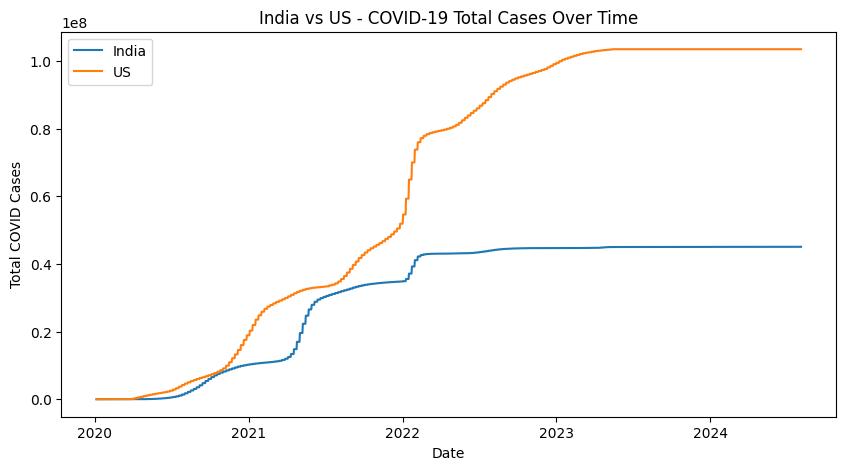

In [ ]:
import matplotlib.pyplot as plt

# Filter for India and US
india = df[df['location'] == 'India']
us = df[df['location'] == 'United States']

# Plot
plt.figure(figsize=(10,5))
plt.plot(india['date'], india['total_cases'], label='India')
plt.plot(us['date'], us['total_cases'], label='US')
plt.xlabel("Date")
plt.ylabel("Total COVID Cases")
plt.title("India vs US - COVID-19 Total Cases Over Time")
plt.legend()
plt.show()


In [ ]:
latest_date = df['date'].max()   # this finds the latest date in the dataset
latest_data = df[df['date'] == latest_date]  # filter only that date
latest_data.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
21775,Asia,2024-08-14,NaN,NaN,NaN,NaN,4721383370
120252,Europe,2024-08-14,NaN,NaN,NaN,NaN,744807803
121602,European Union (27),2024-08-14,NaN,NaN,NaN,NaN,450146793
165198,High-income countries,2024-08-14,NaN,NaN,NaN,NaN,1250514600
217093,Lithuania,2024-08-14,NaN,NaN,NaN,NaN,2750058


In [ ]:
top10 = latest_data.sort_values(by='total_cases', ascending=False).head(10)
top10


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
21775,Asia,2024-08-14,NaN,NaN,NaN,NaN,4721383370
120252,Europe,2024-08-14,NaN,NaN,NaN,NaN,744807803
121602,European Union (27),2024-08-14,NaN,NaN,NaN,NaN,450146793
165198,High-income countries,2024-08-14,NaN,NaN,NaN,NaN,1250514600
217093,Lithuania,2024-08-14,NaN,NaN,NaN,NaN,2750058
230301,Malaysia,2024-08-14,NaN,NaN,NaN,NaN,33938216
408137,Upper-middle-income countries,2024-08-14,NaN,NaN,NaN,NaN,2525921300
424412,World,2024-08-14,NaN,NaN,NaN,NaN,7975105024


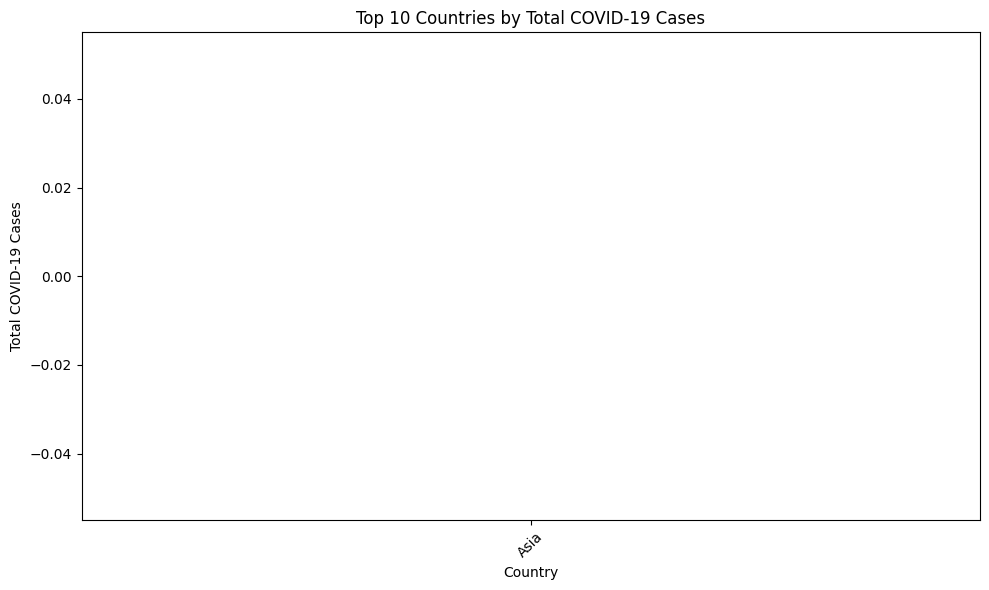

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top10['location'], top10['total_cases'], color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total COVID-19 Cases")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.tight_layout()
plt.show()


In [ ]:
print("Latest date in the dataset:", df['date'].max())



Latest date in the dataset: 2024-08-14 00:00:00


In [ ]:
latest_data = df[df['date'] == df['date'].max()]
print("Number of rows for latest date:", len(latest_data))
latest_data[['location', 'total_cases']].head(10)


Number of rows for latest date: 8


,location,total_cases
21775,Asia,NaN
120252,Europe,NaN
121602,European Union (27),NaN
165198,High-income countries,NaN
217093,Lithuania,NaN
230301,Malaysia,NaN
408137,Upper-middle-income countries,NaN
424412,World,NaN


In [ ]:
df_sorted = df.sort_values(by=['location', 'date'])


In [ ]:
latest_valid_data = df_sorted.groupby('location').last().reset_index()


In [ ]:
latest_valid_data[['location', 'total_cases']].head()


,location,total_cases
0,Afghanistan,235214.0
1,Africa,13145380.0
2,Albania,335047.0
3,Algeria,272139.0
4,American Samoa,8359.0


In [ ]:
top10 = latest_valid_data.sort_values(by='total_cases', ascending=False).head(10)
print(top10[['location', 'total_cases']])


                          location  total_cases
251                          World  775866783.0
97           High-income countries  429044049.0
12                            Asia  301499099.0
71                          Europe  252916868.0
241  Upper-middle-income countries  251753518.0
72             European Union (27)  185822587.0
163                  North America  124492666.0
239                  United States  103436829.0
44                           China   99373219.0
129  Lower-middle-income countries   91954400.0


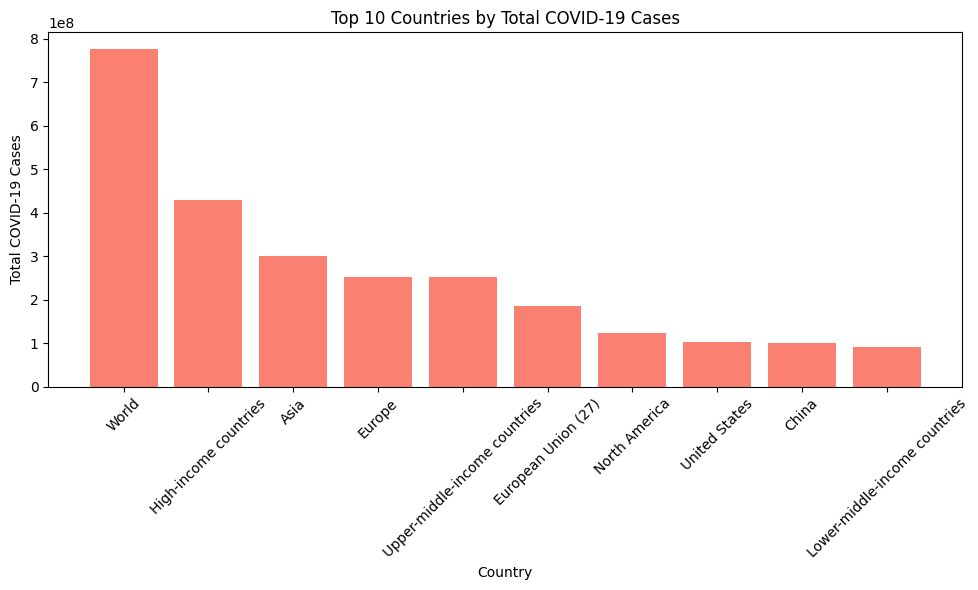

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top10['location'], top10['total_cases'], color='salmon')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total COVID-19 Cases")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.tight_layout()
plt.show()


In [ ]:
india = df[df['location'] == 'India']


In [ ]:
india_cases = india[['date', 'new_cases']]


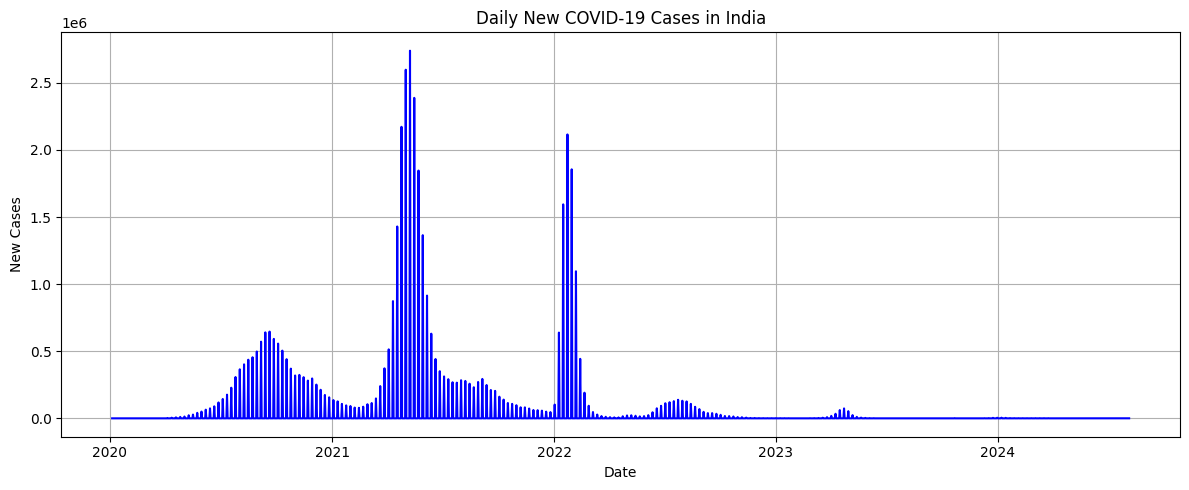

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(india_cases['date'], india_cases['new_cases'], color='blue')
plt.title("Daily New COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
latest_valid_data['fatality_rate'] = (latest_valid_data['total_deaths'] / latest_valid_data['total_cases']) * 100


In [ ]:
latest_valid_data = latest_valid_data[(latest_valid_data['total_cases'] > 0) & (latest_valid_data['total_deaths'] > 0)]


In [ ]:
top10_cfr = latest_valid_data.sort_values(by='fatality_rate', ascending=False).head(10)
print(top10_cfr[['location', 'fatality_rate']])


                   location  fatality_rate
252                   Yemen      18.074508
217                   Sudan       7.885237
221                   Syria       5.508246
210                 Somalia       4.979147
178                    Peru       4.881293
63                    Egypt       4.811801
143                  Mexico       4.390745
28   Bosnia and Herzegovina       4.060783
124                 Liberia       3.707440
0               Afghanistan       3.400308


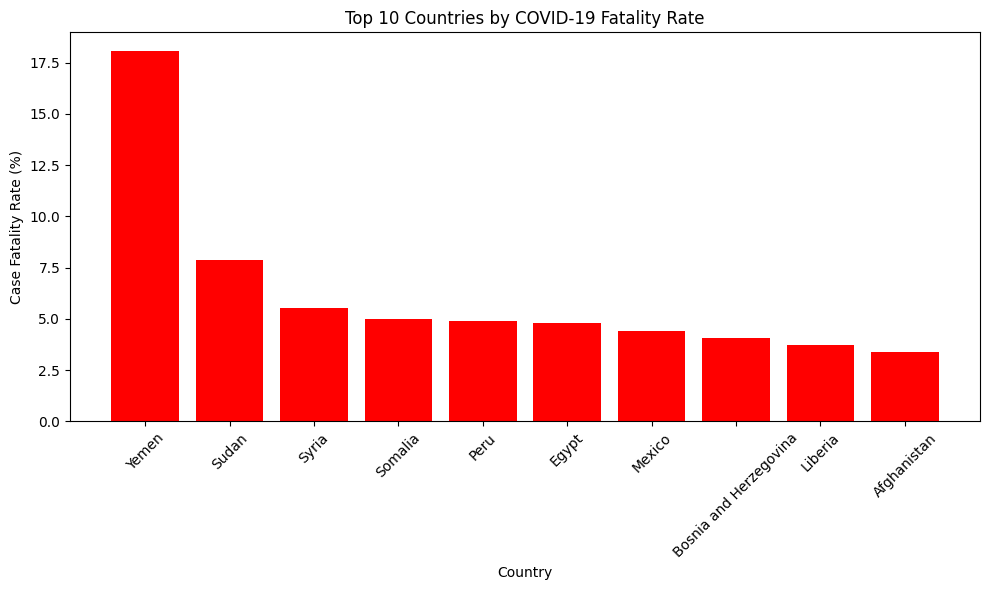

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(top10_cfr['location'], top10_cfr['fatality_rate'], color='red')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Case Fatality Rate (%)")
plt.title("Top 10 Countries by COVID-19 Fatality Rate")
plt.tight_layout()
plt.show()
